# Sorting Algorithms Overview

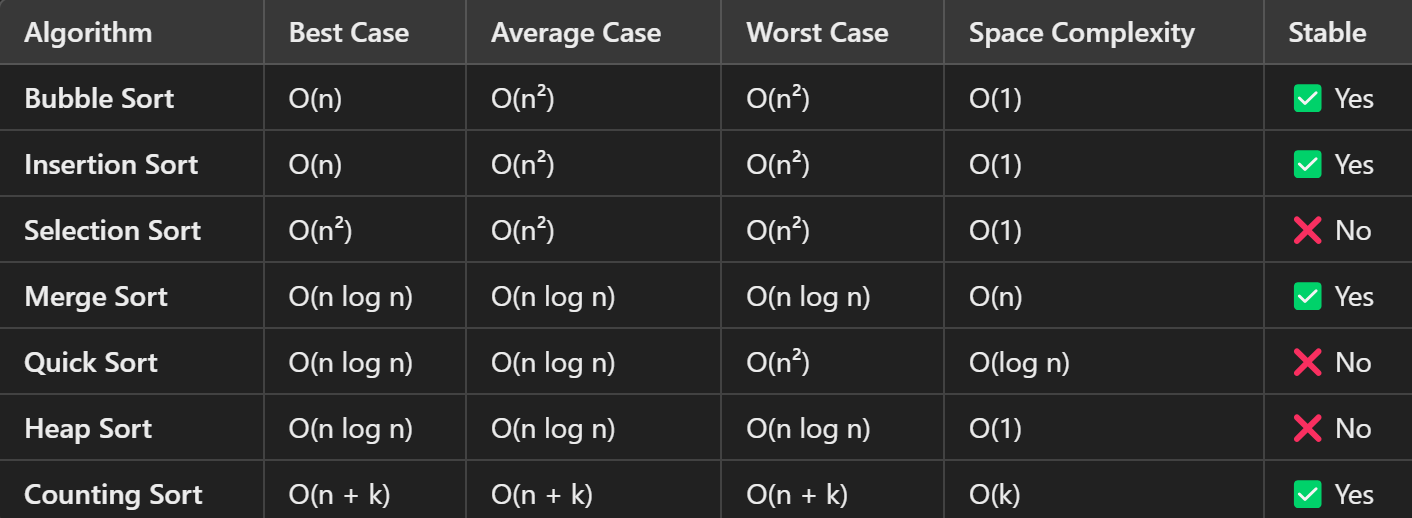

### Dataset Setup

In [1]:
import random

large_arr = [random.randint(1, 1000) for _ in range(20)]  # 20 random integers between 1 and 1000

print("Original Array:")
print(large_arr)


Original Array:
[175, 805, 246, 889, 477, 668, 276, 526, 319, 775, 6, 745, 555, 702, 109, 346, 23, 892, 121, 449]


In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

def animate_sorting_algorithm(sorting_func, arr, title, gif_filename, step=5):
    """
    Animate a given sorting algorithm with additional metrics displayed.
    Ensures the final step is shown in the animation.
    """
    arr = arr.copy()
    fig, ax = plt.subplots()
    ax.set_title(title)
    bar_rects = ax.bar(range(len(arr)), arr, align="edge", color='skyblue')
    ax.set_xlim(0, len(arr))
    ax.set_ylim(0, int(1.1 * max(arr)))
    
    generator = sorting_func(arr)
    step_count = 0
    last_frame = None  # To store the last frame explicitly
    
    def update(frame):
        nonlocal step_count, last_frame
        try:
            for _ in range(step):
                current_state = next(generator)
                step_count += 1
                last_frame = current_state  # Store the last state from generator
            for rect, val in zip(bar_rects, current_state):
                rect.set_height(val)
            ax.set_xlabel(f"Step: {step_count}, Array Size: {len(arr)}")
            return bar_rects  # Return bar_rects for the animation
        except StopIteration:
            # Ensure the final state is displayed
            if last_frame:
                for rect, val in zip(bar_rects, last_frame):
                    rect.set_height(val)
            return bar_rects  # Explicitly return bar_rects
    
    start_time = time.time()
    ani = animation.FuncAnimation(
        fig,
        update,
        repeat=False,
        blit=True,
        interval=30,
        save_count=500,
        cache_frame_data=False
    )
    
    # Save Animation
    ani.save(gif_filename, writer='pillow', fps=20)
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    plt.close(fig)
    print(f"✅ {title} GIF saved as '{gif_filename}'")
    print(f"ℹ️ Execution Time: {elapsed_time:.2f} seconds")
    print(f"ℹ️ Total Steps: {step_count}")
    print(f"ℹ️ Array Size: {len(arr)}")
    print(f"ℹ️ Final Sorted Array: {sorted(arr)}")


### Bubble Sort

Compares adjacent elements and swaps them if they're in the wrong order.

- Best for small datasets

In [3]:
# Bubble Sort with Yield
def bubble_sort(arr): 
    arr = arr.copy() 
    start_time = time.time()
    n = len(arr)
    for i in range(n): # Traverse through all array elements
        swapped = False # Flag to indicate whether any swapping occurred in this pass
        for j in range(0, n - i - 1): # Last i elements are already sorted
            if arr[j] > arr[j + 1]: # if the element found is greater than the next element
                arr[j], arr[j + 1] = arr[j + 1], arr[j] # Swap
                swapped = True # Set the flag to True
                yield arr # Yield the current state of the array
        if not swapped: # If no two elements were swapped in the inner loop, then the array is already sorted
            break # Break the outer loop
    end_time = time.time()
    print(f"Bubble Sort Time: {end_time - start_time:.4f} seconds")

In [8]:
print(f"Array = {large_arr}")

Array = [175, 805, 246, 889, 477, 668, 276, 526, 319, 775, 6, 745, 555, 702, 109, 346, 23, 892, 121, 449]


In [15]:
if __name__ == "__main__":

    print("🔄 Running Bubble Sort Animation...")
    animate_sorting_algorithm(
        bubble_sort, 
        large_arr, 
        "Bubble Sort Animation", 
        "bubble_sort.gif", 
        step=10
    )



🔄 Running Bubble Sort Animation...
Bubble Sort Time: 0.2904 seconds
✅ Bubble Sort Animation GIF saved as 'bubble_sort_fixed.gif'
ℹ️ Execution Time: 22.10 seconds
ℹ️ Total Steps: 103
ℹ️ Array Size: 20
ℹ️ Final Sorted Array: [6, 23, 109, 121, 175, 246, 276, 319, 346, 449, 477, 526, 555, 668, 702, 745, 775, 805, 889, 892]


### Insertion Sort

Builds the sorted array one element at a time.
- Efficient for small datasets or nearly sorted arrays.


In [19]:
# Insertion Sort with Yield
def insertion_sort(arr):
    arr = arr.copy()
    start_time = time.time()
    for i in range(1, len(arr)): 
        key = arr[i] # Key to be compared with
        j = i - 1 # element before the key
        while j >= 0 and arr[j] > key: # Move elements of arr[0..i-1], that are greater than key, to one position ahead of their current position
            arr[j + 1] = arr[j] # Move the elements
            j -= 1 # Decrement the index
            yield arr 
        arr[j + 1] = key # Insert the key into the sorted sequence
        yield arr
    end_time = time.time()
    print(f"Insertion Sort Time: {end_time - start_time:.4f} seconds")


In [20]:
if __name__ == "__main__":

    print("🔄 Running Insertion Sort Animation...")
    animate_sorting_algorithm(
        insertion_sort, 
        large_arr, 
        "Insertion Sort Animation", 
        "insertion_sort.gif", 
        step=1  
    )


🔄 Running Insertion Sort Animation...
Insertion Sort Time: 4.5996 seconds
✅ Insertion Sort Animation GIF saved as 'insertion_sort.gif'
ℹ️ Execution Time: 22.49 seconds
ℹ️ Total Steps: 122
ℹ️ Array Size: 20
ℹ️ Final Sorted Array: [6, 23, 109, 121, 175, 246, 276, 319, 346, 449, 477, 526, 555, 668, 702, 745, 775, 805, 889, 892]


### Selection Sort

Select the minimum element in the unsorted part of the array and place it in the correct position one step at a time.

- Small datasets



In [21]:
def selection_sort(arr):
    arr = arr.copy()
    start_time = time.time()
    n = len(arr)
    for i in range(n):
        min_idx = i # Find the minimum element in the remaining unsorted array
        for j in range(i + 1, n): # Traverse through the unsorted array
            if arr[j] < arr[min_idx]: # If the element is smaller than the current minimum element
                min_idx = j # Update the index of the minimum element
        arr[i], arr[min_idx] = arr[min_idx], arr[i] # Swap the found minimum element with the first element
        yield arr 
    end_time = time.time()
    print(f"Insertion Sort Time: {end_time - start_time:.4f} seconds")


In [22]:
if __name__ == "__main__":

    print("🔄 Running Selection Sort Animation...")
    animate_sorting_algorithm(
        selection_sort, 
        large_arr, 
        "Selection Sort Animation", 
        "selection_sort.gif", 
        step=1  
    )


🔄 Running Selection Sort Animation...
Insertion Sort Time: 0.6849 seconds
✅ Selection Sort Animation GIF saved as 'selection_sort.gif'
ℹ️ Execution Time: 22.53 seconds
ℹ️ Total Steps: 20
ℹ️ Array Size: 20
ℹ️ Final Sorted Array: [6, 23, 109, 121, 175, 246, 276, 319, 346, 449, 477, 526, 555, 668, 702, 745, 775, 805, 889, 892]


### Merge Sort

1. Divide the array into two halves recursively until each sub-array has one element.
2. Merge those halves back together in sorted order.
3. Continue merging until the whole array is sorted.

Key Idea is to break the problem down into smaller pieces and then combine.

- Large datasets

In [33]:
def merge_sort(arr):
    arr = arr.copy()
    global start_time
    
    start_time = time.time()
    
    def merge(arr, temp, left, mid, right): # Merge two sorted arrays
        i, j, k = left, mid + 1, left # Initial index of first, second subarray and merged subarray
        
        while i <= mid and j <= right: # Traverse through both arrays
            if arr[i] <= arr[j]: # If the element in the first array is less than the second array
                temp[k] = arr[i] # Copy the element to the temporary array
                i += 1 # Increment the index of the first array
            else:
                temp[k] = arr[j] # Copy the element to the temporary array
                j += 1 # Increment the index of the second array
            k += 1 # Increment the index of the merged array
            yield arr.copy() 
        
        while i <= mid: # when elements of the first array are left
            temp[k] = arr[i] # Copy the element to the temporary array
            i += 1  
            k += 1 
            yield arr.copy()
        
        while j <= right: # when elements of the second array are left
            temp[k] = arr[j]
            j += 1
            k += 1
            yield arr.copy()
        
        for i in range(left, right + 1): # Copy the elements from the temporary array to the original array
            arr[i] = temp[i] 
            yield arr.copy()
    
    def merge_sort_recursive(arr, temp, left, right):
        if left < right: # If there is more than one element
            mid = (left + right) // 2 # Find the middle point to divide the array into two halves
            yield from merge_sort_recursive(arr, temp, left, mid) # Call merge_sort_recursive for the first half
            yield from merge_sort_recursive(arr, temp, mid + 1, right) # Call merge_sort_recursive for the second half
            yield from merge(arr, temp, left, mid, right) # Merge the two halves
    
    temp = [0] * len(arr) # Temporary array to store the elements
    yield from merge_sort_recursive(arr, temp, 0, len(arr) - 1) # Call the recursive function
    
    end_time = time.time()


In [34]:
if __name__ == "__main__":

    print("🔄 Running Merge Sort Animation...")
    animate_sorting_algorithm(
        merge_sort, 
        large_arr, 
        "Merge Sort Animation", 
        "merge_sort.gif", 
        step=1  
    )


🔄 Running Merge Sort Animation...
✅ Merge Sort Animation GIF saved as 'merge_sort.gif'
ℹ️ Execution Time: 25.31 seconds
ℹ️ Total Steps: 176
ℹ️ Array Size: 20
ℹ️ Final Sorted Array: [6, 23, 109, 121, 175, 246, 276, 319, 346, 449, 477, 526, 555, 668, 702, 745, 775, 805, 889, 892]


### Quick Sort
Partition around a pivot(last element) and recursively sort smaller partitions (smaller and larger than the pivot).

- Large datasets, faster on average than Merge Sort.

In [35]:
def quick_sort(arr):

    arr = arr.copy()
    global start_time

    start_time = time.time()
    
    def partition(low, high):
        pivot = arr[high]  # Choose the last element as the pivot
        i = low - 1  # Pointer for greater element
        
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
                yield arr.copy()
        
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        yield arr.copy()
        
        return i + 1

    def quick_sort_recursive(low, high):
        if low < high:
            pi = yield from partition(low, high)
            yield from quick_sort_recursive(low, pi - 1)
            yield from quick_sort_recursive(pi + 1, high)

    yield from quick_sort_recursive(0, len(arr) - 1)
    
    end_time = time.time()
    print(f"✅ Quick Sort Time: {end_time - start_time:.4f} seconds")


In [36]:
if __name__ == "__main__":
    print("🔄 Running Quick Sort Animation...")
    animate_sorting_algorithm(
        quick_sort,
        large_arr,
        "Quick Sort Animation",
        "quick_sort.gif",
        step=1
    )


🔄 Running Quick Sort Animation...
✅ Quick Sort Time: 1.5714 seconds
✅ Quick Sort Animation GIF saved as 'quick_sort.gif'
ℹ️ Execution Time: 23.11 seconds
ℹ️ Total Steps: 43
ℹ️ Array Size: 20
ℹ️ Final Sorted Array: [6, 23, 109, 121, 175, 246, 276, 319, 346, 449, 477, 526, 555, 668, 702, 745, 775, 805, 889, 892]


### Heap Sort

1. Build a Max Heap (a tree structure where the parent is always greater than its children).
2. Swap the root (maximum value) with the last element of the array.
3. Reduce the heap size and repeat.

- Situations where in-place sorting is required.



In [37]:
import time

def heap_sort(arr):
    """
    Generator-based Heap Sort for animation.
    Tracks execution time accurately.
    """
    arr = arr.copy()
    global start_time

    # Start the timer on the initial call
    start_time = time.time()

    def heapify(n, i):
        largest = i  # Initialize largest as root
        left = 2 * i + 1  # Left child
        right = 2 * i + 2  # Right child

        # Check if left child exists and is larger than root
        if left < n and arr[left] > arr[largest]:
            largest = left
        # Check if right child exists and is larger than largest so far
        if right < n and arr[right] > arr[largest]:
            largest = right

        # Swap and continue heapifying if root is not the largest
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            yield arr.copy()
            yield from heapify(n, largest)

    n = len(arr)

    # Build a maxheap
    for i in range(n // 2 - 1, -1, -1):
        yield from heapify(n, i)

    # Extract elements one by one
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Swap the root with the last element
        yield arr.copy()
        yield from heapify(i, 0)  # Heapify the reduced heap

    # End the timer when sorting is complete
    end_time = time.time()
    total_time = end_time - start_time
    print(f"✅ Heap Sort Time: {total_time:.4f} seconds")


In [38]:
if __name__ == "__main__":
    print("🔄 Running Heap Sort Animation...")
    animate_sorting_algorithm(
        heap_sort,
        large_arr,
        "Heap Sort Animation",
        "heap_sort.gif",
        step=1
    )


🔄 Running Heap Sort Animation...
✅ Heap Sort Time: 2.9152 seconds
✅ Heap Sort Animation GIF saved as 'heap_sort.gif'
ℹ️ Execution Time: 22.90 seconds
ℹ️ Total Steps: 75
ℹ️ Array Size: 20
ℹ️ Final Sorted Array: [6, 23, 109, 121, 175, 246, 276, 319, 346, 449, 477, 526, 555, 668, 702, 745, 775, 805, 889, 892]


### Counting Sort

Use counting instead of comparisons to sort the array: 
1. Count the occurrences of each element in the array.
2. Calculate cumulative counts for positions.
3. Place each element in its correct position based on count.

- Integers or categorical data with a limited range.



In [39]:
def counting_sort(arr):

    arr = arr.copy()
    global start_time
    start_time = time.time()
    
    max_val = max(arr) # Find the maximum value in arr
    count = [0] * (max_val + 1) # Create a count array to store the count of each unique value in arr
    output = [-1] * len(arr) # Create an output array to store the sorted array

    # Step 1: Count occurrences
    for num in arr:
        count[num] += 1

    # Step 2: Update count array to store positions
    for i in range(1, len(count)):
        count[i] += count[i - 1]

    # Step 3: Build the output array (reverse for stability)
    for num in reversed(arr):
        output[count[num] - 1] = num # Place the element at the correct position in the output array
        count[num] -= 1 
        yield output.copy()

    # Step 4: Copy to the original array
    for i in range(len(arr)):
        arr[i] = output[i]
        yield arr.copy()
    
    end_time = time.time()


In [40]:
if __name__ == "__main__":

    print("🔄 Running Counting Sort Animation...")
    animate_sorting_algorithm(
        counting_sort,
        large_arr,
        "Counting Sort Animation",
        "counting_sort_fixed.gif",
        step=1
    )


🔄 Running Counting Sort Animation...
✅ Counting Sort Animation GIF saved as 'counting_sort_fixed.gif'
ℹ️ Execution Time: 22.28 seconds
ℹ️ Total Steps: 40
ℹ️ Array Size: 20
ℹ️ Final Sorted Array: [6, 23, 109, 121, 175, 246, 276, 319, 346, 449, 477, 526, 555, 668, 702, 745, 775, 805, 889, 892]


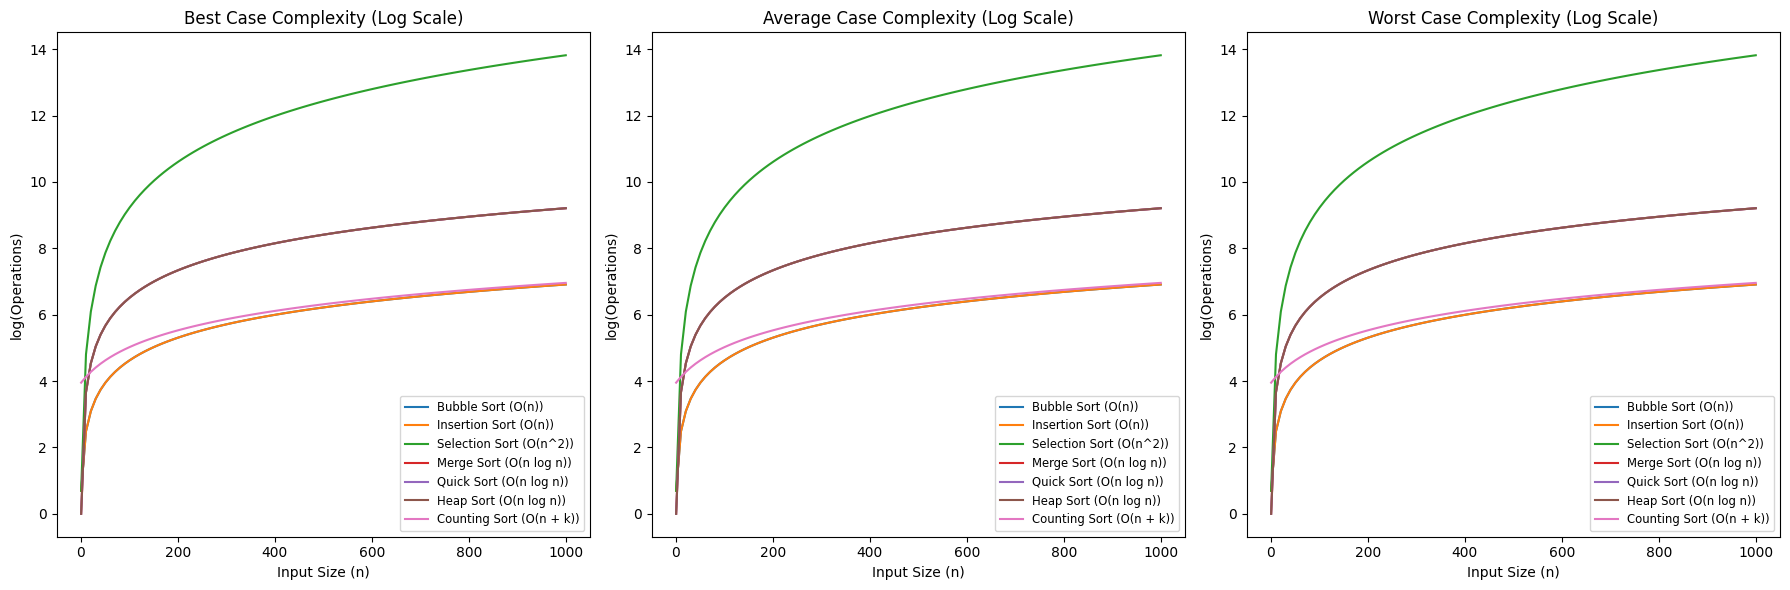

In [ ]:
import numpy as np
# Input sizes
input_sizes = np.linspace(1, 1000, 100, dtype=int)

# Complexity functions
def O_n(n): return n
def O_n2(n): return n**2
def O_nlogn(n): return n * np.log2(n)
def O_logn(n): return np.log2(n)
def O_nk(n, k=50): return n + k

# Complexity values
complexities = {
    "Bubble Sort (O(n))": O_n(input_sizes),
    "Insertion Sort (O(n))": O_n(input_sizes),
    "Selection Sort (O(n^2))": O_n2(input_sizes),
    "Merge Sort (O(n log n))": O_nlogn(input_sizes),
    "Quick Sort (O(n log n))": O_nlogn(input_sizes),
    "Heap Sort (O(n log n))": O_nlogn(input_sizes),
    "Counting Sort (O(n + k))": O_nk(input_sizes)
}

# Plotting with Logarithmic Scale
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

scenarios = ["Best Case", "Average Case", "Worst Case"]
for i, scenario in enumerate(scenarios):
    ax = axes[i]
    for algo, values in complexities.items():
        ax.plot(input_sizes, np.log1p(values), label=algo)  # log1p for clarity
    
    ax.set_title(f"{scenario} Complexity (Log Scale)")
    ax.set_xlabel("Input Size (n)")
    ax.set_ylabel("log(Operations)")
    ax.legend(fontsize="small")

plt.tight_layout()
plt.show()


**Stable Sorting Algorithm:**

Maintains the relative order of records with equal keys.
- Example: If two records have the same value, and one appears before the other in the original array, a stable sort will preserve this order in the sorted array.

**Unstable Sorting Algorithm:**

Does not guarantee preserving the relative order of records with equal keys.
- Example: Two equal records might switch places during sorting.

When sorting complex data structures (e.g., objects with multiple fields), stability ensures that secondary sorting criteria remain consistent **Stability guarantees predictable results**.